# FACTORIZACION QR

In [156]:
from IPython.display import Image

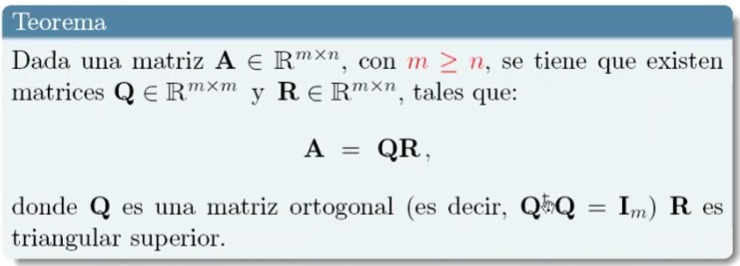

In [157]:
Image(filename='qr_1.jpeg')

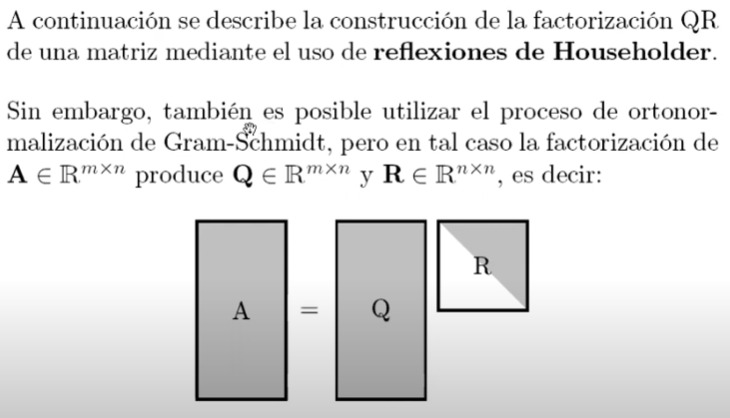

In [158]:
Image(filename='qr_1prima.jpeg')

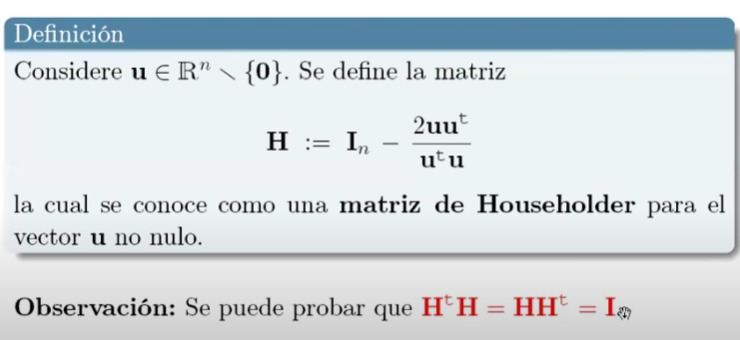

In [159]:
Image(filename='qr_2.jpeg')

## Ejemplo

In [160]:
Id=identity_matrix(2)
u = matrix([0,1])

In [161]:
uut=u.T*u
utu=u*u.T
H = Id-2*(1/utu[0,0])*uut
H

[ 1  0]
[ 0 -1]

Interpretación geométrica de un vector

In [162]:
a, b = var('a, b')
x = matrix([a,b])
y = H*x.T
y

[ a]
[-b]

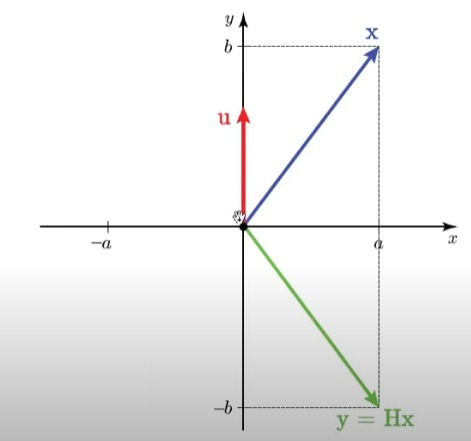

In [163]:
Image(filename='qr_3.jpeg')

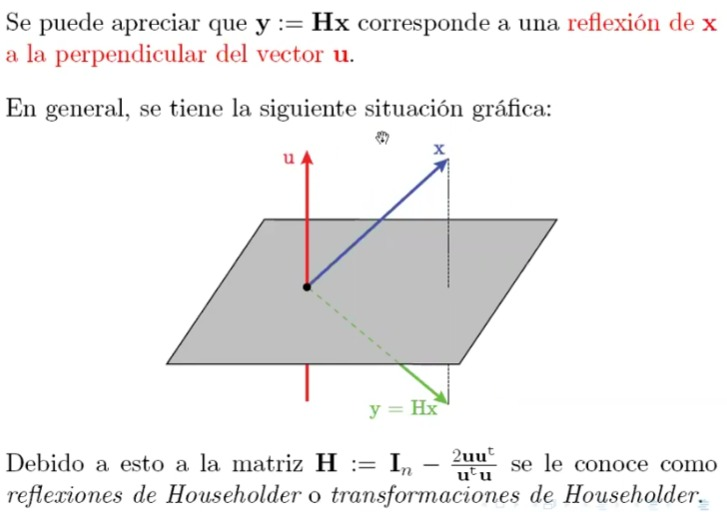

In [164]:
Image(filename='qr_4.jpeg')

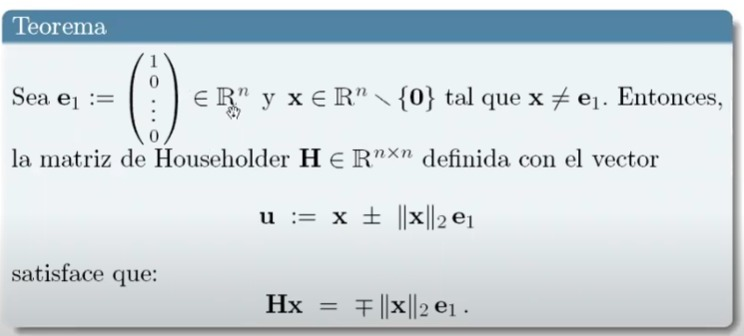

In [165]:
Image(filename='qr_5.jpeg')

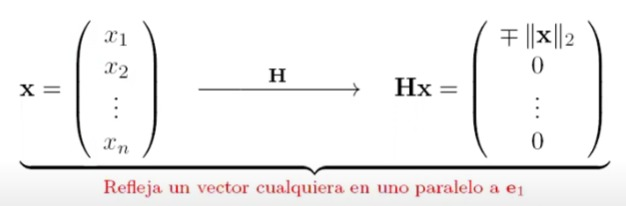

In [166]:
Image(filename='qr_6.jpeg')

Respecto del signo de **u**$=x\pm||x||_2 e_1$, toma el signo de $x_1$. 
Es decir:

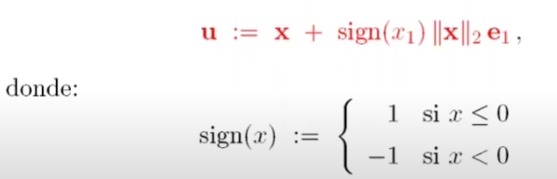

In [167]:
Image(filename='qr_7.jpeg')

In [168]:
import numpy as np
#import numpy.linalg as npl
def sign(x):
    if x >= 0:
        return 1
    if x < 0:
        return -1


In [169]:
x1=matrix([-4,3,0])
e1=matrix([1,0,0])
u1=x1+sign(x1[0])*(x1.norm())*e1
u1

[-9.0  3.0  0.0]

In [170]:
Id3=identity_matrix(3)
uut=u1.T*u1
utu=u1*u1.T
H = Id3-2*(1/utu[0,0])*uut
H

[-0.8  0.6  0.0]
[ 0.6  0.8  0.0]
[ 0.0  0.0  1.0]

In [171]:
R=H*x1.T
R.round(4)

[5.0]
[0.0]
[0.0]

## Construccion de la factorización QR a traves de reflexiones de Householder

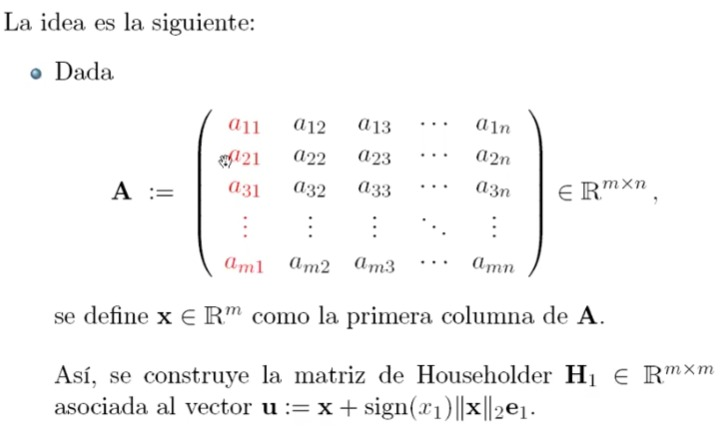

In [172]:
Image(filename='qr_8.jpeg')

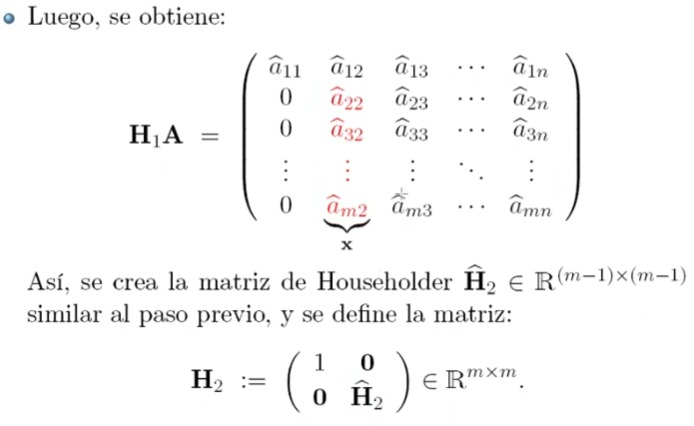

In [173]:
Image(filename='qr_9.jpeg')

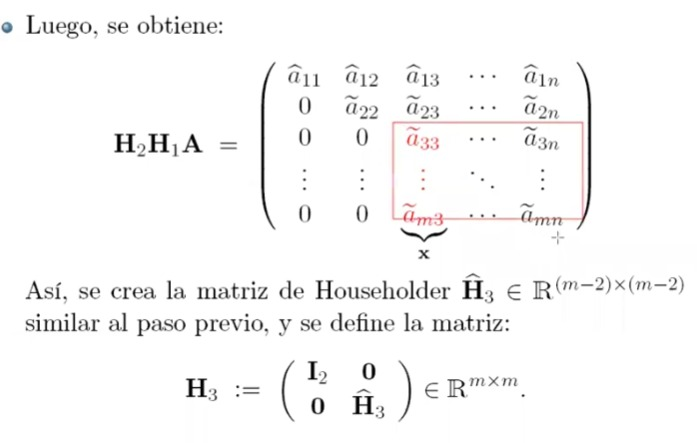

In [174]:
Image(filename='qr_10.jpeg')

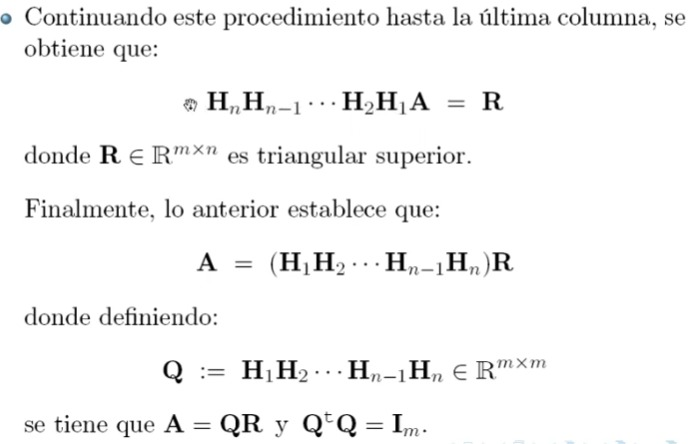

In [175]:
Image(filename='qr_11.jpeg')

## Ejemplo

In [176]:
A=matrix([[-1,-1,1],
         [1,3,3],
         [-1,-1,5],
         [1,3,7]])
A

[-1 -1  1]
[ 1  3  3]
[-1 -1  5]
[ 1  3  7]

In [177]:
x1=matrix([-1,1,-1,1])
e1=matrix([1,0,0,0])
u1=x1+sign(x1[0])*(x1.norm())*e1
u1

[-3.0  1.0 -1.0  1.0]

In [178]:
Id4=identity_matrix(4)
uut=u1.T*u1
utu=u1*u1.T
H1 = Id4-2*(1/utu[0,0])*uut
H1.round(3)

[  -0.5    0.5   -0.5    0.5]
[   0.5  0.833  0.167 -0.167]
[  -0.5  0.167  0.833  0.167]
[   0.5 -0.167  0.167  0.833]

In [179]:
H1A=H1*A
H1A.round(3)

[  2.0   4.0   2.0]
[  0.0 1.333 2.667]
[ -0.0 0.667 5.333]
[  0.0 1.333 6.667]

In [183]:
x2=matrix(H1A[1:,1])
print(x2.round(3))
e2=matrix([1,0,0])
u2=x2.T+sign(H1A[1,1])*(x2.norm())*e2
u2.round(3)

[1.333]
[0.667]
[1.333]


[3.333 0.667 1.333]

In [138]:
Id3=identity_matrix(3)
uut=u2.T*u2
utu=u2*u2.T
H_2 = Id3-2*(1/utu[0,0])*uut
H_2.round(3)

[-0.667 -0.333 -0.667]
[-0.333  0.933 -0.133]
[-0.667 -0.133  0.733]

In [139]:
H2= matrix(identity_matrix(RR,4))
H2[1:,1:]=H_2
np.around(H2,decimals=4)

array([[ 1.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.6667, -0.3333, -0.6667],
       [ 0.    , -0.3333,  0.9333, -0.1333],
       [ 0.    , -0.6667, -0.1333,  0.7333]])

In [140]:
H_3=H2*H1A
np.around(H_3,decimals=4)

array([[ 2. ,  4. ,  2. ],
       [-0. , -2. , -8. ],
       [-0. ,  0. ,  3.2],
       [ 0. , -0. ,  2.4]])

In [141]:
x3=matrix(H_3[2:,2])
e3=matrix([1,0])
u3=x3.T+sign(H1A[1,1])*(x3.norm())*e3
np.around(u3,decimals=4)

array([[7.2, 2.4]])

In [142]:
Id4=identity_matrix(2)
uut=u3.T*u3
utu=u3*u3.T
H_4 = Id4-2*(1/utu[0,0])*uut
np.around(H_4,decimals=4)

array([[-0.8, -0.6],
       [-0.6,  0.8]])

In [143]:
H3= matrix(identity_matrix(RR,4))
H3[2:,2:]=H_4
np.around(H3,decimals=4)

array([[ 1. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. , -0.8, -0.6],
       [ 0. ,  0. , -0.6,  0.8]])

In [144]:
R=H3*H_3
np.around(R,decimals=4)

array([[ 2.,  4.,  2.],
       [-0., -2., -8.],
       [ 0.,  0., -4.],
       [ 0., -0.,  0.]])

In [145]:
Q=H1*H2*H3
np.around(Q,decimals=4)

array([[-0.5, -0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [-0.5, -0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [146]:
np.around(Q*R,decimals=4)

array([[-1., -1.,  1.],
       [ 1.,  3.,  3.],
       [-1., -1.,  5.],
       [ 1.,  3.,  7.]])